---
layout: default
title: "Neural Networks - Applications"
categories: neuralNetwork
permalink: /ML14/
order: 14
---

In [1]:
%pylab --no-import-all inline
import pandas as pd
from draw_neural_net import draw_neural_net

Populating the interactive namespace from numpy and matplotlib


# Neural Network builds complex non-linear functions
In this section we will explain how a neural network can build relatively complex non-linear functions.

Let's take a non-linear classification example like that depicted below, where panel A is just a simplified version of panel B.

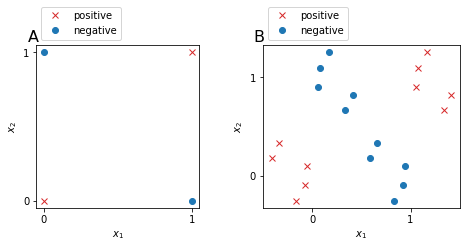

In [83]:
x1x2=np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
ax1, ax2 = axes
p = x1x2[:2]
n = x1x2[2:]
ax1.plot(*p.T, ls='none', marker='x', c='C3', label='positive')
ax1.plot(*n.T, ls='none', marker='o', c='C0', label='negative')
pp = np.repeat(p, [5, 5], 0)
nn = np.repeat(n, [5, 5], 0)
jitter = np.random.rand(5, 2)
jitter = np.r_[jitter, 1-jitter] - .5
ax2.plot(*(pp + jitter).T, ls='none', marker='x', c='C3', label='positive')
ax2.plot(*(nn + jitter[::-1]).T, ls='none', marker='o', c='C0', label='negative')

for ax, lbl in zip(axes, ['A', 'B']):
    ax.text(-0.05, 1, lbl, transform=ax.transAxes,
      fontsize=16, va='bottom')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_aspect(1)
    ax.legend(bbox_to_anchor=(0, 1), loc='lower left')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])

This is a non-linear classification example modeled by the logical XNOR function

$$
\begin{align}
&x_1 \; \text{XNOR} \; x_2 \\
&\text{NOT} \; (x_1 \; \text{XOR} \; x_2)
\end{align}
$$


## Logical AND function
Let's look at a neural network that can calculate the logical $\text{AND}$ function.

$$
\begin{align}
&x_1,x_2\in \lbrace 0,1 \rbrace\\
&y= x_1 \wedge x_2\\
&\Theta^{(1)} = 
\begin{bmatrix}-30\\20\\20\end{bmatrix}
\end{align}
$$

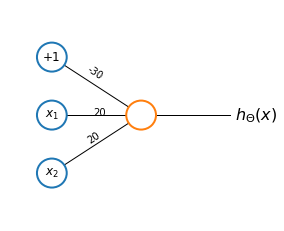

In [2]:
fig, ax = plt.subplots(figsize=(4.4, 4))
colors=['C0'] * 3 + ['C1'] * 1
nodelabels=["+1", "$x_1$", "$x_2$"]
elabels = [-30, 20, 20]
draw_neural_net(ax, .1, .9, .1, .9, [3, 1], colors=colors, node_labels=nodelabels, 
                edge_labels=elabels, output='$h_\\Theta(x)$', lwn=2)
ax.set_xlim(-.1, 1);

So that 

$$
\begin{equation}
h_\Theta(x) = g(-30+20x_1+20x_2)
\end{equation}
\label{eq:h} \tag{1}
$$

Since the sigmoid activation function $g(z)$ is

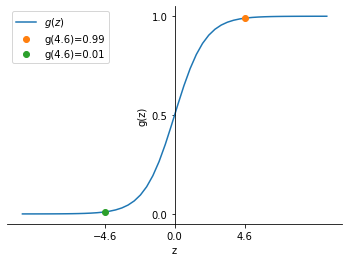

In [3]:
fig, ax = plt.subplots()
z = np.linspace(-10,10)
sigmoid = lambda z: 1/(1+np.e**-z)
ax.plot(z, sigmoid(z), label='$g(z)$')
ax.plot(4.6, sigmoid(4.6), ls='none', marker='o', label=f"g(4.6)={sigmoid(4.6):.2f}")
ax.plot(-4.6, sigmoid(-4.6), ls='none', marker='o', label=f"g(4.6)={sigmoid(-4.6):.2f}")
ax.legend()
ax.set_xlabel('z')
ax.set_ylabel('g(z)')
ax.set_yticks([0, .5, 1])
ax.set_xticks([-4.6, 0, 4.6])
ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The the output of $\eqref{eq:h}$ is

In [4]:
x1x2=[[0, 0], [0, 1], [1, 0], [1, 1]]
df = pd.DataFrame(x1x2, columns=['$x_1$', '$x_2$'])
h = lambda s: -30 + 20*s[0] + 20*s[1]
f = lambda z: f'$g({z}) \\approx {sigmoid(z):.0f}$' 
df["$h_\\Theta(x)$"] = df.apply(h, 1).apply(f)
df.style.set_properties(**{'text-align': 'left'}).hide_index()

$x_1$,$x_2$,$h_\Theta(x)$
0,0,$g(-30) \approx 0$
0,1,$g(-10) \approx 0$
1,0,$g(-10) \approx 0$
1,1,$g(10) \approx 1$


Which is exactly the $x_1 \wedge x_2$.

## Logical OR function
The following network and table show instead $x_1 \vee x_2$

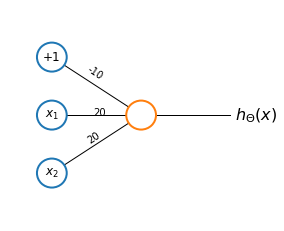

In [5]:
fig, ax = plt.subplots(figsize=(4.4, 4))
colors=['C0'] * 3 + ['C1'] * 1
nodelabels=["+1", "$x_1$", "$x_2$"]
elabels = [-10, 20, 20]
draw_neural_net(ax, .1, .9, .1, .9, [3, 1], colors=colors, node_labels=nodelabels, 
                edge_labels=elabels, output='$h_\\Theta(x)$', lwn=2)
ax.set_xlim(-.1, 1);

$$h_\Theta(x) = g(-10+20x_1+20x_2)$$

In [6]:
x1x2=[[0, 0], [0, 1], [1, 0], [1, 1]]
df = pd.DataFrame(x1x2, columns=['$x_1$', '$x_2$'])
h = lambda s: -10 + 20*s[0] + 20*s[1]
f = lambda z: f'$g({z}) \\approx {sigmoid(z):.0f}$' 
df["$h_\\Theta(x)$"] = df.apply(h, 1).apply(f)
df.style.set_properties(**{'text-align': 'left'}).hide_index()

$x_1$,$x_2$,$h_\Theta(x)$
0,0,$g(-10) \approx 0$
0,1,$g(10) \approx 1$
1,0,$g(10) \approx 1$
1,1,$g(30) \approx 1$


## Logical NOT function

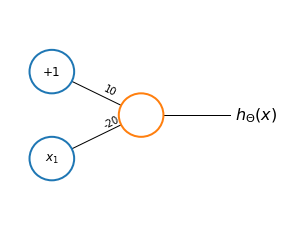

In [7]:
fig, ax = plt.subplots(figsize=(4.4, 4))
colors=['C0'] * 2 + ['C1'] * 1
nodelabels=["+1", "$x_1$"]
elabels = [10, -20]
draw_neural_net(ax, .1, .9, .1, .9, [2, 1], colors=colors, node_labels=nodelabels, 
                edge_labels=elabels, output='$h_\\Theta(x)$', lwn=2)
ax.set_xlim(-.1, 1);

In [8]:
x1=[0, 1]
df = pd.DataFrame(x1, columns=['$x_1$'])
h = lambda s: 10 -20*s
f = lambda z: f"$g({z[0]}) \\approx {sigmoid(z)[0]:.0f}$"
df["$h_\Theta(x)$"] = df.apply(h, 1).apply(f, 1)
df.style.set_properties(**{'text-align': 'left'}).hide_index()

$x_1$,$h_\Theta(x)$
0,$g(10) \approx 1$
1,$g(-10) \approx 0$


## Logical NOT-1 AND NOT-2 function

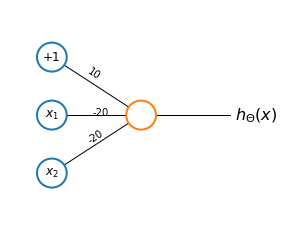

In [9]:
fig, ax = plt.subplots(figsize=(4.4, 4))
colors=['C0'] * 3 + ['C1'] * 1
nodelabels=["+1", "$x_1$", "$x_2$"]
theta = [10, -20, -20]
draw_neural_net(ax, .1, .9, .1, .9, [3, 1], colors=colors, node_labels=nodelabels, 
                edge_labels=theta, output='$h_\\Theta(x)$', lwn=2)
ax.set_xlim(-.1, 1);

In [10]:
x1x2=[[0, 0], [0, 1], [1, 0], [1, 1]]
df = pd.DataFrame(x1x2, columns=['$x_1$', '$x_2$'])
h = lambda s: 10 + -20*s[0] + -20*s[1]
f = lambda z: f'$g({z}) \\approx {sigmoid(z):.0f}$' 
df["$h_\\Theta(x)$"] = df.apply(h, 1).apply(f)
df.style.set_properties(**{'text-align': 'left'}).hide_index()

$x_1$,$x_2$,$h_\Theta(x)$
0,0,$g(10) \approx 1$
0,1,$g(-10) \approx 0$
1,0,$g(-10) \approx 0$
1,1,$g(-30) \approx 0$


## Logical XNOR function

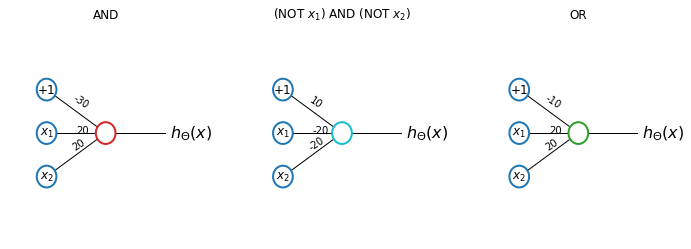

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax1, ax2, ax3 = axes
nodelabels=["+1", "$x_1$", "$x_2$"]
# AND
ax1.set_title('AND')
draw_neural_net(ax1, .2, .8, .2, .8, [3, 1], colors=['C0'] * 3 + ['C3'] * 1, node_labels=nodelabels, 
                edge_labels=[-30, 20, 20], output='$h_\\Theta(x)$', lwn=2)

# NOT1 AND NOT2
ax2.set_title('(NOT $x_1$) AND (NOT $x_2$)')
draw_neural_net(ax2, .2, .8, .2, .8, [3, 1], colors=['C0'] * 3 + ['C9'] * 1, node_labels=nodelabels, 
                edge_labels=[10, -20, -20], output='$h_\\Theta(x)$', lwn=2)

# OR
ax3.set_title('OR')
draw_neural_net(ax3, .2, .8, .2, .8, [3, 1], colors=['C0'] * 3 + ['C2'] * 1, node_labels=nodelabels, 
                edge_labels=[-10, 20, 20], output='$h_\\Theta(x)$', lwn=2)

for ax in axes:
    ax.set_xlim(0, 1)

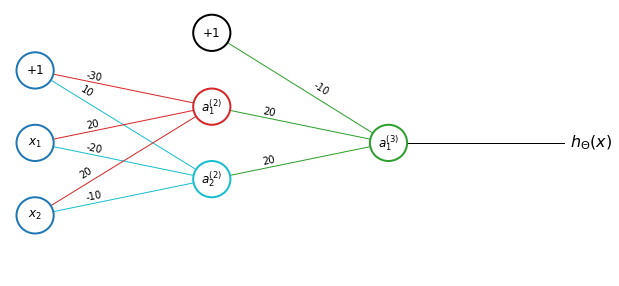

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
colors=['C0'] * 3 + ['C3', 'C9', 'C2']
nodelabels=["+1", "$x_1$", "$x_2$", "$a_1^{(2)}$", "$a_2^{(2)}$", "$a_1^{(3)}$"]
theta = [-30, 10, 20, -20, 20, -10, 20, 20, '', -10]
draw_neural_net(ax, .1, 2, .1, .9, [3, 2, 1], colors=colors, node_labels=nodelabels, 
                edge_labels=theta, output='$h_\\Theta(x)$', lwn=2, edgecolors=['C3', 'C9', 'C3', 'C9', 'C3', 'C9', 'C2', 'C2', 'k', 'C2'],
                bias_nodes=[False, True, False]
               )
ax.set_xlim(0, 2);

In [33]:
x1x2=[[0, 0], [0, 1], [1, 0], [1, 1]]
df = pd.DataFrame(x1x2, columns=['$x_1$', '$x_2$'])
a12 = lambda s: -30 + 20*s[0] + 20*s[1]
a22 = lambda s: 10 + -20*s[0] + -20*s[1]
f = lambda z: np.round(sigmoid(z)).astype(int)
df["$a_1^{(2)}$"] = df.apply(a12, 1).apply(f)
df["$a_2^{(2)}$"] = df.apply(a22, 1).apply(f)
a13 = lambda s: -10 + 20*s[2] + 20*s[3]
df["$h_\\Theta(x)$"] = df.apply(a13, 1).apply(f)
df.style.set_properties(**{'text-align': 'left'}).hide_index()

$x_1$,$x_2$,$a_1^{(2)}$,$a_2^{(2)}$,$h_\Theta(x)$
0,0,0,1,1
0,1,0,0,0
1,0,0,0,0
1,1,1,0,1
